# <div style="text-align: center;">ACM40990 OPTIMISATION IN MACHINE LEARNING </div>
# <div style="text-align: center;"> ASSIGNMENT 1 </div>
# <div style="text-align: center;"> David Lisovski - 18306686 </div>

# Question 1 (a)
Suppose we have a set of predictors $(x, y)_i$ and a response $Y$. A function of the form
\begin{equation}
    f(X,\beta)= X\beta
\end{equation}
where 
\begin{equation}
X = \begin{bmatrix}1 & x_{11} &x_{2n}\\\vdots & \vdots &\vdots\\ 1 & x_{n1} &x_{n2}\end{bmatrix}; \ \beta = \begin{bmatrix}a \\ b \\ c\end{bmatrix}, 
\end{equation}
fits the data set if it satisfies the following optimization problem
\begin{equation}
 \min_x \; f(x)=\frac{1}{2}||X\beta - Y||_2^2
\end{equation}

We can solve the optimization problem analytically or numerically via gradient descent.
$$ \beta^{(k+1)} = \beta^{(k)} - \alpha_k g^{(k)}$$
where $g^{(k)}=\nabla f(X,\beta^{(k)})=X^T (X \beta - Y)$ and step-size $\alpha_k$ to be taken by a fixed constant, backtrack line-search, or solving the Wolfe conditions.

The following code cells import necessary dependencies and load the dataset `regression.csv'.

In [1]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data into numpy array
data = np.loadtxt("regression.csv", delimiter=",")
# split into y, x
X = np.c_[np.repeat(1, data.shape[0]),data[:,0:2]]
Y = np.vstack(data[:, 2])

The following code cell defines the maximum number of iterations of gradient descent, and a maximum gradient norm tolerance.

In [3]:
tol = 1e-4
maxit = 1000

Finally, the following code cell defines an initial estimate for $\beta$.

In [4]:
beta_0 = np.vstack([1,1,1])

# Question 1 - b

The following code cell defines a gradient descent method with Cauchy step-size to optimize the linear regression model.

In [5]:
def GD_4_LS_Cauchy(A,b,x,tol,maxit): 
    #keep track of current point
    xvec = x.copy()
    #Compute residuals
    res = A@x-b
    #Compute gradient of optimisation function
    gradx = A.T@(res)
    #Compute optimisation function
    funcx = 0.5*np.linalg.norm(res)**2
    iter = 0
    converged = False
    #main loop - break when maximum # iterations reach or when |gradx| <= tol
    while iter < maxit and not converged:
        #compute derivative
        Ag = A@gradx
        #compute step-size using Cauchy-step
        alpha = np.linalg.norm(gradx)**2/np.linalg.norm(Ag)**2
        #update point
        x = x - alpha*gradx
        #append new point to list
        xvec = np.hstack([xvec,x])
        res = A@x-b
        gradx = A.T@(res)
        #append gradient to list
        funcx = np.hstack([funcx,0.5*np.linalg.norm(res)**2])
        iter += 1
        if np.linalg.norm(gradx) < tol:
            converged = True
    return x,xvec,funcx, converged

z_lscauchy, zvec_lscauchy, funvec_lscauchy, flag = GD_4_LS_Cauchy(X, Y, beta_0, tol, maxit)
print(f"Optimal values (a={z_lscauchy[0][0]}, b={z_lscauchy[1][0]}, c={z_lscauchy[2][0]}). \
        \nConvergence flag {flag}. \
        \nNumber of steps taken = {zvec_lscauchy.shape[1]}")

Optimal values (a=3.814997745031247, b=4.08826046272887, c=4.7593362014537615).         
Convergence flag True.         
Number of steps taken = 11


# Question 1 - c

The following code cell defines a gradient descent method with Barzilai-Borwein step-size of optimizing the linear regression model.

In [6]:
def GD_4_LS_BB(A,b,x,tol,maxit): 
    x_curr = x
    x_prev = 0*x
    #keep track of current point
    xvec = x.copy()
    #Compute residuals
    res = A@x-b
    #Compute gradient of LS
    grad_curr = A.T@(res)
    grad_prev = 0*grad_curr
    #Compute cost function
    funcx = 0.5*(np.linalg.norm(res)**2)
    iter = 0
    converged = False
    #main loop - break when maximum # iterations reach or when |gradx| <= tol
    while iter<maxit and not converged:
        #compute derivative
        Ag = A@grad_curr
        #compute step-size using BB
        s_k = x_curr - x_prev
        y_k = grad_curr - grad_prev
        alpha = np.linalg.norm(s_k)**2 / (s_k.T@y_k)
        #update point
        x_prev = x_curr
        x_curr = x_curr - alpha*grad_curr
        #append new point to list
        xvec = np.hstack([xvec,x_curr])
        res = A@x_curr-b
        #update gradient
        grad_prev = grad_curr
        grad_curr = A.T@(res)
        #append gradient to list
        funcx = np.hstack([funcx,0.5*(np.linalg.norm(res)**2)])
        iter += 1
        if np.linalg.norm(grad_curr) < tol:
            converged = True
    return x_curr,xvec,funcx, converged

z_lsBB,zvec_lsBB,funvec_lsBB, flag = GD_4_LS_BB(X, Y, beta_0, tol, maxit)
print(f"Optimal values (a={z_lsBB[0][0]}, b={z_lsBB[1][0]}, c={z_lsBB[2][0]}). \
        \nConvergence flag {flag}. \
        \nNumber of steps taken = {zvec_lsBB.shape[1]}")

Optimal values (a=3.814997779886995, b=4.08826050107299, c=4.759336248130019).         
Convergence flag True.         
Number of steps taken = 8


# Question 1 - D

The following code cells create a contour plot of the optimization function (Equation 2) and illustrates the steps taken by the two methods.

In [7]:
#Generate mesh
xx = np.linspace(0,5,200)
yy = np.linspace(-1,5,200)
Xgrid,Ygrid = np.meshgrid(xx,yy)
Z = np.zeros(Xgrid.shape)
#Compute cost function at each point of mesh
for i in range(Xgrid.shape[0]):
    for j in range (Xgrid.shape[1]):
        Z[i,j] = 0.5*(np.linalg.norm(X@np.vstack([1, Xgrid[i,j],Ygrid[i,j]])-Y)**2)

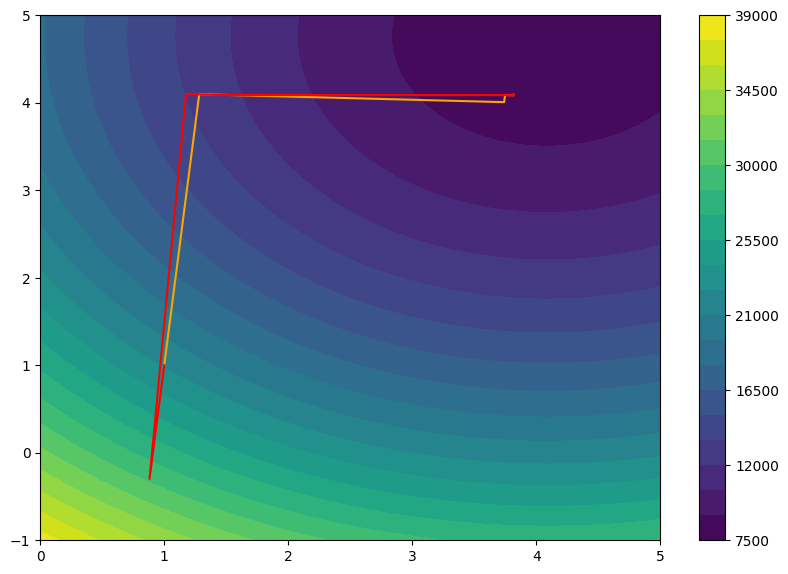

In [8]:
#plot mesh and steps taken by each method
fig = plt.figure(figsize=(10,15))

ax = fig.add_subplot(2, 1, 1)
plt.contourf(Xgrid,Ygrid,Z, levels=25)
plt.colorbar()
plt.plot(zvec_lscauchy[0,:],zvec_lscauchy[1,:], c = "orange")
plt.plot(zvec_lsBB[0,:],zvec_lsBB[1,:], c = "red")

The Figure above illustrate the steps taken by the two methods. Method 1 (orange), using Cauchy step-length, takes repeated orthogonal steps towards the minimum. Method 1 took 12 steps before convergence. It struggled to converge quickly close to the solution and took many repeated orthogonal steps close to the solution.  

Method 2 (red), using Barzilai-Borwein, takes a similar approach but is able to minimize the cost function in less steps. Method 2 took 3 steps before convergence.

# Question 1 - E

The following code cells create a plot of the data points and optimized function.

In [9]:
# Generate mesh
xx = np.linspace(np.min(data[:,0])-1,np.max(data[:,0])+1,25)
yy = np.linspace(np.min(data[:,1])-1,np.max(data[:,1])+1,25)
Xgrid,Ygrid = np.meshgrid(xx,yy)
Z_cauchy = np.zeros(Xgrid.shape)
Z_BB = np.zeros(Xgrid.shape)
#Compute function at each point of mesh
for i in range(Xgrid.shape[0]):
    for j in range (Xgrid.shape[1]):
        v = np.hstack([1, Xgrid[i,j],Ygrid[i,j]])
        Z_cauchy[i,j] = (v@z_lscauchy)[0]
        Z_BB[i,j] = (v@z_lsBB)[0]

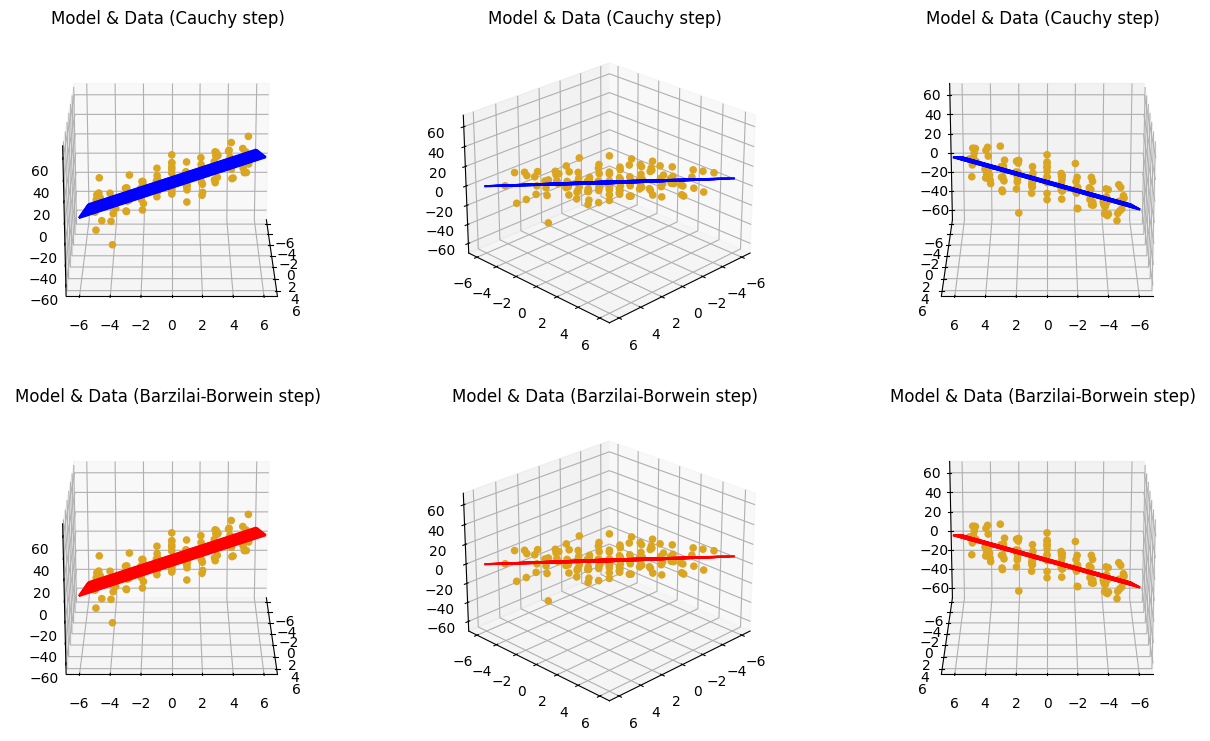

In [10]:
# plot mesh and function by each method
fig, ax = plt.subplots(nrows=2, ncols=3, subplot_kw={"projection": "3d"}, figsize=(16,9), gridspec_kw={'height_ratios': [1, 1]})

views = [0, 45, 90]
elevs = [20., 25., 20.]

for row, axes in enumerate(ax):
    for col, ax_row in enumerate(axes):
        if (row == 0):
            ax_row.plot_wireframe(Xgrid, Ygrid, Z_cauchy, color="blue")
            ax_row.set_title("Model & Data (Cauchy step)")
        else:
            ax_row.plot_wireframe(Xgrid, Ygrid, Z_BB, color="red")
            ax_row.set_title("Model & Data (Barzilai-Borwein step)")

        ax_row.scatter(data[:,0],data[:,1],data[:,2],marker='o', s=20, c="goldenrod", alpha=1)
        ax_row.view_init(elev=elevs[col], azim=views[col])

The Figures above illustrate the model fit. The model fit by Method 1 is illustrated in blue. The model fit by Method 2 is illustrated in orange. Both methods yield the same model. This suggests has a global minimum.

## Question 1 - f
The Newton method of optimisation is given by $$\beta_{k+1}=\beta_k-B^{-1}(x_k)\nabla f(x_k)$$
Newton's descent direction for linear regression is derived as follows
\begin{align}
f(x) &= \frac{1}{2}||X\beta-Y||^2_2,\\
\nabla f(x) &= \frac{1}{2}\nabla_\beta ||X\beta - Y||^2_2,\\
            &= X^T(X\beta-Y),\\
B(x) &= \nabla^2 f(x) = X^TX,\\
\implies p_k &= -B^{-1}(x_k)\nabla f(x_k),\\ 
             &= -(X^TX)^{-1}X^T(X\beta-Y),\\ 
             &= -(X^TX)^{-1}X^TX\beta +(X^TX)^{-1}X^TY,\\
             &= -\beta + (X^TX)^{-1}X^TY
\end{align}
Hence
\begin{align}
\beta_{k+1} &= \beta_k + p_k,\\
            &= \beta_k - \beta_k + (X^TX)^{-1}X^TY,\\
            &= (X^TX)^{-1}X^TY.
\end{align}
This update is equivalent to the `normal' equations used in linear regression. This update does not depend on $\beta$. The problem is quadratic in nature and contains one repeated root, the global minimum. Newton's method finds the global minimum in one step. 

# Question 2

The following code cell defines the Rosenblatt function, derivative, and Hessian.

In [11]:
#Define Rosenblatt function
f = lambda x : 10*(x[1,0] - x[0,0]**2)**2 + (1-x[0,0])**2
#Define derivative of Rosenblatt
df = lambda x : np.vstack([[x[0,0]*(40*x[0,0]**2-40*x[1,0]+2)-2],
                             [20*(x[1,0]-x[0,0]**2)]])
#Define hessian of Rosenblatt
hf = lambda x : np.vstack([[120*x[0,0]**2 - 40*x[1,0] + 2, -40*x[0,0]],
                             [-40*x[0,0], 20]])
#Define quadratic approximation of Rosenblatt function
f_qa = lambda fx, g, B, p : fx + (p.T@g)[0,0] + 0.5*(p.T@B@p)[0,0]

In [12]:
x0 = np.vstack([-1.4, 
                1.1])
tol = 1e-4
maxit = 1000

# Question 2 - a

The following code cell defines a gradient descent method with Armijo backtracking linesearch step-size to optimize the Rosenblatt function.

In [13]:
def GD_Armijo(x, tol, maxit): 
    #keep track of current point
    xvec = x.copy()
    funcx = f(x)
    alpha = 1
    c = 1e-9
    rho = 0.8
    converged = False
    iter = 0
    while iter < maxit and not converged:
        alpha = 1
        fx = f(x)
        dfx = df(x)

        p = -dfx/np.linalg.norm(dfx)
        pdfx = (p.T@dfx)[0]
        
        #compute step-size using armijo condition
        while (f(x + alpha*p) > fx + c*alpha*pdfx):
            alpha = alpha*rho
        x = x + alpha*p
        
        xvec = np.hstack([xvec,x])
        funcx = np.hstack([funcx,fx])
        iter += 1
        if np.linalg.norm(dfx) < tol:
            p
            converged = True
    return x,xvec,funcx, converged

We use the function in the following code cell to optimize the Rosenblatt function.

In [14]:
z_gd,zvec_gd,funvec_gd,flag = GD_Armijo(x0, tol, maxit)
print(f"Optimal values (x0={z_gd[0][0]}, x1={z_gd[1][0]}). \
        \nConvergence flag {flag}. \
        \nNumber of steps taken = {zvec_gd.shape[1]}")

Optimal values (x0=0.999921206755154, x1=0.9998190172625057).         
Convergence flag False.         
Number of steps taken = 1001


# Question 2 - b

The following code cell defines a Newton descent method with Armijo backtracking linesearch step-size to optimize the Rosenblatt function.

In [15]:
#Question (b)
def ND_Armijo(x, tol, maxit): 
    #keep track of current point
    xvec = x.copy()
    funcx = f(x)
    converged = False
    iter = 0
    alpha = 1
    c = 1e-9
    rho = 0.8
    while iter < maxit and not converged:
        alpha = 1
        fx = f(x)
        dfx = df(x)
        ddfx = hf(x)
        p = -np.linalg.solve(ddfx, dfx)

        pdfx = (p.T@dfx)[0]
        
        #compute step-size using armijo condition
        while (f(x + alpha*p) > fx + c*alpha*pdfx):
            alpha = alpha*rho
        x = x + alpha*p
        
        xvec = np.hstack([xvec,x])
        funcx = np.hstack([funcx,fx])
        iter += 1
        if np.linalg.norm(dfx) < tol:
            p
            converged = True
    return x,xvec,funcx, converged

We use the function in the following code cell to optimize the Rosenblatt function.

In [16]:
z_nd,zvec_nd,funvec_nd,flag = ND_Armijo(x0, tol, maxit)
print(f"Optimal values (x0={z_nd[0][0]}, x1={z_nd[1][0]}). \
        \nConvergence flag {flag}. \
        \nNumber of steps taken = {zvec_nd.shape[1]}")

Optimal values (x0=0.999999999999999, x1=0.9999999999999921).         
Convergence flag True.         
Number of steps taken = 13


# Question 2 - c

The following code cells create a contour plot of the optimization function (Equation 2) and illustrates the steps taken by the two methods.

In [17]:
xx = np.linspace(-2,2,200)
yy = np.linspace(-2,2,200)
Xgrid,Ygrid = np.meshgrid(xx,yy)
Z = np.zeros(Xgrid.shape)

for i in range(Xgrid.shape[0]):
    for j in range (Xgrid.shape[1]):
        Z[i,j] = f(np.vstack([Xgrid[i,j],Ygrid[i,j]]))

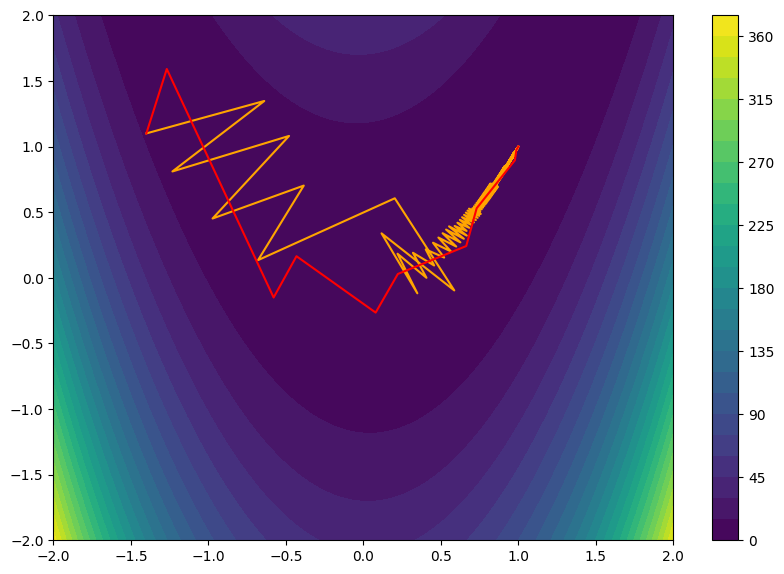

In [18]:
fig = plt.figure(figsize=(10,15))

ax = fig.add_subplot(2, 1, 1)
plt.contourf(Xgrid,Ygrid,Z, levels=25)
plt.colorbar()
plt.plot(zvec_gd[0,:],zvec_gd[1,:], c = "orange")
plt.plot(zvec_nd[0,:],zvec_nd[1,:], c = "red")

Newton's method takes a streamlined approach towards the minimum. It is able to converge to the minimum in 13 steps. Illustated in the figure above is the path taken by Newton's method. The path taken is always in the direction of the minimum.

Gradient descent takes a zig-zag approach towards the minimum. It repeatedly takes orthogonal steps towards the minimum (hopping from one slope to another). This leads to very slow convergence (it took >1000 iterati